In [1]:
import pandas as pd 
import numpy as np
import scipy as scp
import matplotlib as mlp
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,adjusted_mutual_info_score,adjusted_rand_score
from sklearn import preprocessing

In [ ]:

file1='train3.csv'
dataframe=pd.read_csv(file1)
dataframe=dataframe.dropna(axis=0)
dataframe=dataframe.drop(['area','price'],1)

#dataframe1=dataframe[['lat', 'lon', 'bhk','city', 'type', 'rate','source','price']]
#dataframe2=dataframe

df=dataframe
print(df.columns,df.shape)

df.head()

In [3]:
#Multiple type of data

In [ ]:
print("Enter option")
option=int(input())
data=pd.DataFrame()

#all
df=df
source=df['source'].unique()
print(df['source'].unique())

if option==0:
  df0=df
  df0=df0.drop(['source'],1)
  data=df0

#All data 1 source
if option==1:
   print("Enter Source number")
   i1=int(input())
   df1=df[(df['source'] == source[i1])]
   df1=df1.drop(['source'],1)
   data=df1

#Mix All data
if option==2:
   print("Enter Source number 1 & 2")
   i=int(input())
   j=int(input())
   df2=df[(df['source'] == source[i])]
   df2=pd.concat([ df1, df[(df['source'] == source[j])]])
   df2=df2.drop(['price','source'],1)
   data=df2
#Mix3rd quartile
if option==4:
   print("Enter Source number 1 & 2")      
   i=int(input())
   j=int(input())
   df3=df[(df['source'] == source[i]) & (df['rate']<df['rate'].describe()[6])]
   df3=pd.concat([ df3, df[(df['source'] == source[j]) & (df['rate']<df['rate'].describe()[6])]])
   df3=df3.drop(['price','source'],1)
   data=df3

#mix 30000
if option==5:
   print("Enter Source number 1 & 2")
   i=int(input())
   j=int(input())
   df4=df[((df['source'] == source[i])|(df['source'] == source[j]))&
       (df['rate']<30000)]
   df4=df4.drop(['price','source'],1)
   data=df4

#15000 mix
if option==6:
   print("Enter Source number 1 & 2")
   i=int(input())
   j=int(input())
   df5=df[((df['source'] == source[i])|(df['source'] == source[j]))&
       (df['rate']<15000)]
   df5=df5.drop(['price','source'],1)
   data=df5
    
if option==7:
   print("Enter Source number")
   i1=int(input())
   df1=df[(df['source'] == source[i1])]
   df1=df1.drop(['source'],1)
   data=df1[:20000]


#data=Normalize(data)
#Plot(data)
#data=Outlier(daat)
#data=TransformLog(data)





Enter option


In [ ]:
#plot with outlier
#plot all feature vs target


def PlotAll():
        import matplotlib.pyplot as plt
        df=NullEncoding(data)
        X=df.copy()
        del X['rate']
        for i in X.columns:

          plt.scatter(X[i], df['rate'], edgecolor='black', s=20)
          plt.xlabel(i, fontsize=14)
          plt.ylabel("rate", fontsize=14)
          plt.show()

In [ ]:
feature_names,get_fscore,get_score=Start(data)

In [ ]:
#Main 

In [ ]:
def Start(df):
    
    df=NullEncoding(df)
    
    df=FeatureSelection(df)
    
    print(df.columns)
    
    a,b,c,d=Split(df)
    
    dtrain,params,num_round,feature_names,get_fscore,get_score=Model1(a,b,c,d)
    
    return feature_names,get_fscore,get_score
    
    
 
    #param=Tuning(dtrain,params,num_round)
    # Model2( a, b, c, d,param[0],param[1])

# Transform

In [ ]:
def TransformLog(df1):
    df1['rate']=np.log(df1['rate'])
    for i in df1.columns:
     if df1[df1[i]==0].shape[0]==0:
       if np.corrcoef(df1['rate'],np.log(df1[i]))[0][1]> np.corrcoef(df1['rate'],df1[i])[0][1]:
          print(i)
          df1[i]=np.log(df1[i])
    return df1

# Normalize

In [ ]:
def Normalize(df1):
  index0=df1[(df1['rate']<df1['rate'].describe()[5])].index
  index1=df1[(df1['rate']>df1['rate'].describe()[5])].index
  from random import randrange
  random=[i  for i  in index0  if i%2==0]
  index2=sorted(tuple(set(random).union(set(index1))))
  index=[i for i in index2 if i in df1.index]
  df1=df1.ix[index,:]
  return df1


# Plot target variable /Stats of target #distribution

In [ ]:
def Plot(df1)   :
   Y=df1['rate']
   # Import library and dataset
   import seaborn as sns
   # Control the number of bins
   sns.distplot(Y, bins=20)
   #print(df1['rate'].describe())
   

# outliers


In [210]:
def Outlier(df1):
    from sklearn.covariance import EllipticEnvelope
    i1=EllipticEnvelope().fit(df1).predict(df1)
    from sklearn.neighbors import LocalOutlierFactor
    i2=LocalOutlierFactor().fit_predict(df1)
    
    
    d=dict(zip(df1.index,i1))
    index1=[i for i in d.keys() if d[i]==1 ]
    d=dict(zip(df1.index,i2))
    index2=[i for i in d.keys() if d[i]==1 ]
   
    
    df1=df1.ix[sorted(list(set(index1).union(set(index2))))]
    return df1

# 1. NAN/NULL/Missing                   2.  Numerical data/Categorical data/Encoding

In [10]:
def NullEncoding(df2):
      numCols=[]
      for i in df2.columns:
        if df2[i].dtypes=='int64' or df2[i].dtypes=='float64':
            
               #if np.corrcoef(df2[i],target)[0][1]>.1:
               numCols.append(i)
              
      
      #categorical
      StringCol=[]
      for i in df2.columns:
          if df2[i].dtypes!='int64' and df2[i].dtypes!='float64':
              df2[i]=df2[i].apply(str)
              le=preprocessing.LabelEncoder().fit(df2[i])
              df2[i] =le.transform(df2[i])
              pd.to_numeric(df2[i]).astype(np.float)
              StringCol.append(i)
      final=StringCol+numCols
    
      df2=df2.dropna(axis=0)
      return df2

# Feature selection


In [207]:
def FeatureSelection(df):
    df1=df.copy()
    a,b,c,d=Split(df1)
    feature_names,get_fscore=Model3(a,b,c,d)
    import operator
    sorted1 = sorted(get_fscore.items(), key=operator.itemgetter(1))
    col=sorted1
   
    
    v=[i[1] for i in col]
    k1=[i[0] for i in col if i[1]>np.mean(v)]
        
    df2=df[k1].copy()
    df2['rate']=df['rate']
    return df2
    

In [208]:
def FeatureSelection(df):
    df1=df.copy()
    a,b,c,d=Split(df1)
    feature_names,get_fscore=Model3(a,b,c,d)
    import operator
    sorted1 = sorted(get_fscore.items(), key=operator.itemgetter(1))
    col=sorted1
   
    
    v=[i[1] for i in col]
    k1=[i[0] for i in col if i[1]>np.median(v)]
        
    df2=df[k1].copy()
    df2['rate']=df['rate']
    return df2

In [96]:
k=[range(1,100)]
type(np.mean(k))

numpy.float64

In [81]:
get_fscore.values()

dict_values([])

[0]	train-mae:3337.54	test-mae:2914.27
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 10 rounds.
[1]	train-mae:2361.46	test-mae:2180.34
[2]	train-mae:1696.42	test-mae:1683.37
[3]	train-mae:1251.59	test-mae:1420.57
[4]	train-mae:919.232	test-mae:1219.8
[5]	train-mae:708.608	test-mae:1072.24
[6]	train-mae:561.589	test-mae:1027.19
[7]	train-mae:458.131	test-mae:998.233
[8]	train-mae:401.342	test-mae:949.288
[9]	train-mae:360.819	test-mae:978.833
[10]	train-mae:332.099	test-mae:966.707
[11]	train-mae:305.506	test-mae:967.763
[12]	train-mae:288.545	test-mae:977.112
[13]	train-mae:273.981	test-mae:962.045
[14]	train-mae:257.512	test-mae:970.988
[15]	train-mae:259.278	test-mae:984.23
[16]	train-mae:244.28	test-mae:1012.38
[17]	train-mae:225.694	test-mae:1024.77
[18]	train-mae:224.127	test-mae:1024.74
Stopping. Best iteration:
[8]	train-mae:401.342	test-mae:949.288



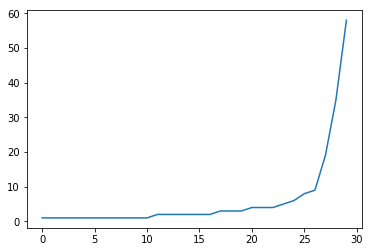

In [143]:
df1=df[:100].copy()
df1=NullEncoding(df1)
a,b,c,d=Split(df1)
feature_names,get_fscore=Model3(a,b,c,d)

import operator
sorted1 = sorted(get_fscore.items(), key=operator.itemgetter(1))
col=sorted1
k=[i[0] for i in col ]

v=[i[1] for i in col ]



import matplotlib.pyplot as plt
#sns.l('features','values',dfp)
r=range(len(k))
plt.plot(r,v)

In [55]:
import operator
sorted1 = sorted(get_fscore.items(), key=operator.itemgetter(1))
col=sorted1
k=[i[0] for i in col if i[1]>100]
v=[i[1] for i in col]


['city', 'hotel5', 'type', 'source', 'bhk', 'lat', 'lon', 'price']

In [77]:
def Model3( X_train, X_test, y_train, y_test):
   import xgboost as xgb
   params={'colsample_bytree': 1.0,
    'eta': .3,
    'eval_metric': 'mae',
    'max_depth': 4,
    'min_child_weight': 1,
    'objective': 'reg:linear',
    'subsample': 0.8}
   
   params['eval_metric'] = "mae"
   num_round = 50
   
   # use DMatrix for xgbosot
   dtrain = xgb.DMatrix(X_train, label=y_train)
   dtest = xgb.DMatrix(X_test, label=y_test)
   
   watchlist = [(dtrain,'train'), (dtest,'test')]
   
   model = xgb.train(
       params,
       dtrain,
       num_boost_round=num_round,
       evals=watchlist,
       early_stopping_rounds=10,
     
       #feval=MRE_error,
       #obj=Linregobj
   )
  
   return model.feature_names,model.get_fscore()
  

# Data split

In [13]:
def Split(df3):
  
   target=df3['rate'] 
   del df3['rate']
   data=df3.copy()
   from sklearn.cross_validation import train_test_split
   X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.24, random_state=42)
   return  X_train, X_test, y_train, y_test
       


# Model

In [203]:
def Model1( X_train, X_test, y_train, y_test):
   import xgboost as xgb
   params={'colsample_bytree': 1.0,
    'eta': .3,
    'eval_metric': 'mae',
    'max_depth': 4,
    'min_child_weight': 1,
    'objective': 'reg:linear',
    'subsample': 0.8}
   
   params['eval_metric'] = "mae"
   num_round = 7000
   
   # use DMatrix for xgbosot
   dtrain = xgb.DMatrix(X_train, label=y_train)
   dtest = xgb.DMatrix(X_test, label=y_test)
   
   watchlist = [(dtrain,'train'), (dtest,'test')]
   
   model = xgb.train(
       params,
       dtrain,
       num_boost_round=num_round,
       evals=watchlist,
       early_stopping_rounds=10,
       #feval=MRE_error,
      # obj=log_cosh_obj
   )
   return dtrain,params,num_round,model.feature_names,model.get_fscore(),model.get_score()
  

# Tuning

In [15]:
def Tuning(dtrain,params,num_boost_round):
    # You can try wider intervals with a larger step between
    # each value and then narrow it down. Here after several
    # iteration I found that the optimal value was in the
    # following ranges.
    
    gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(1,7)
    for min_child_weight in range(1,5)
    ]
    
    # Define initial best params and MAE
    min_mae = float("Inf")
    best_params = None
    for max_depth, min_child_weight in gridsearch_params:
        print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))

        # Update our parameters
        params['max_depth'] = max_depth
        params['min_child_weight'] = min_child_weight

        # Run CV
        cv_results = xgb.cv(
            params,
            dtrain,
            num_boost_round=1000,
            seed=42,
            nfold=5,
            metrics={'mae'},
            early_stopping_rounds=10
        )

        # Update best MAE
        mean_mae = cv_results['test-mae-mean'].min()
        boost_rounds = cv_results['test-mae-mean'].argmin()
        print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
        if mean_mae < min_mae:
           min_mae = mean_mae
           best_params = (max_depth,min_child_weight)
    return best_params

In [62]:
def Model2( X_train, X_test, y_train, y_test,max_depth,min_child_weight):
   import xgboost as xgb

   params={'colsample_bytree': 1.0,
    'eta': .3,
    'eval_metric': 'mae',

    'objective': 'reg:linear',
    'subsample': 0.8}
   
   params['eval_metric'] = "mae"
   params['max_depth']=max_depth,
   params['min_child_weight']=min_child_weight,
   num_round = 4000
   
   # use DMatrix for xgbosot
   dtrain = xgb.DMatrix(X_train, label=y_train)
   dtest = xgb.DMatrix(X_test, label=y_test)
   
   watchlist = [(dtrain,'train'), (dtest,'eval')]
   
   model = xgb.train(
       params,
       dtrain,
       num_boost_round=num_round,
       evals=watchlist,
       early_stopping_rounds=10,
       #feval=MRE_error,
       #obj=Linregobj
   )
   

# Custom loss

In [17]:
def huber_approx_obj(preds, dtrain):
    d = dtrain.get_label() - preds  #remove .get_labels() for sklearn
    h = 1  #h is delta in the graphic
    scale = 1 + (d / h) ** 2
    scale_sqrt = np.sqrt(scale)
    grad = d / scale_sqrt
    hess = 1 / scale / scale_sqrt
    return grad, hess

In [18]:
def Customloss(preds, dtrain):
    labels = dtrain.get_label()
    grad = np.log(preds) - np.log(labels)
    grad2 =(1-.2 *grad)*grad
    return  grad,grad2

In [191]:
def log_cosh_obj(preds, dtrain):
    x = dtrain.get_label() - preds
    grad = np.tanh(x)*2
    hess = 1 / np.cosh(x)**2
    
    _threshold=np.median(x)
    var =.1
    grad = (np.abs(x)<_threshold )*grad - (np.abs(x)>=_threshold )*var
    
    hess = (np.abs(x)<_threshold )*hess + (np.abs(x)>=_threshold )
    print(x)
    return grad, hess



In [198]:
def Linregobj( preds, dtrain):
    
    labels = dtrain.get_label()
    x = preds - labels
    grad=x
    hess = preds * (1.0-preds)
    
    _len=len(preds)
    
    _threshold=np.mean(x)
    var =.01
    grad = (np.abs(x)<_threshold )*grad - (np.abs(x)>=_threshold )*var
    
    hess = (np.abs(x)<_threshold )*hess + (np.abs(x)>=_threshold )
    print(x)
    return grad, hess
    

# Custom Error

In [21]:
def MRE_error(y, y0):
    
    y0=y0.get_label()    
    
    return 'error',np.mean(np.abs(y-y0)/y0)